In [1]:
# Loads the autoreload extension in Notebook
%load_ext autoreload
# Sets the autoreload mode to reload all modules before executing code
%autoreload 2

In [2]:
import pandas as pd

In [3]:
from caits.loading import load_yaml_config
from caits.visualization import plot_signal

In [4]:
config = load_yaml_config("config.yml")

# WAV - Audio data in uni-axis (mono)

Check audio specs

In [5]:
from caits.loading import wav_specs_check

In [6]:
audio_params = wav_specs_check("data/yes.wav")

In [7]:
audio_params

{'nchannels': 1,
 'sampwidth': 2,
 'framerate': 16000,
 'nframes': 16000,
 'comptype': 'NONE',
 'compname': 'not compressed'}

Load audio

In [8]:
from caits.loading import wav_loader

In [9]:
audio_load = wav_loader("data/yes.wav")

In [10]:
print(type(audio_load))
print(type(audio_load[0]))
print(type(audio_load[1]))

<class 'tuple'>
<class 'pandas.core.frame.DataFrame'>
<class 'int'>


In [11]:
print(audio_load[0].shape)

(16000, 1)


In [12]:
print(audio_load[1])

16000


In [13]:
audio_df = audio_load[0]
audio_df.head()

,ch_1
0,-0.000763
1,-0.000824
2,-0.000732
3,-0.000549
4,-0.000427


### Plotting

Plot signal in samples

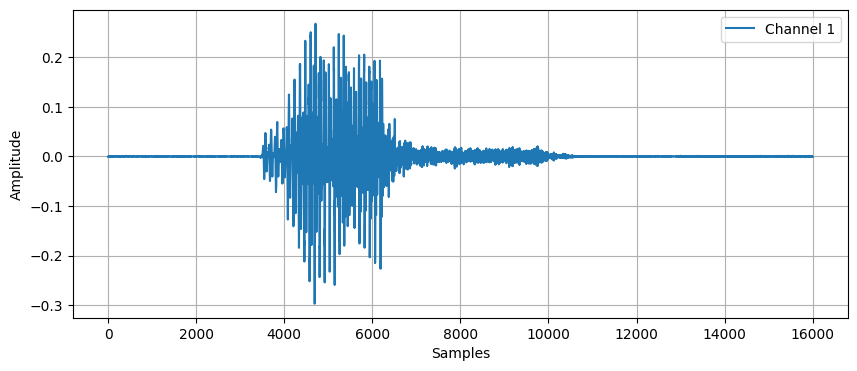

In [16]:
plot_signal(sig=audio_load[0].values, sr=audio_params["framerate"], return_mode=False)

# Filtering - Butterworth

In [17]:
from caits.filtering import filter_butterworth

In [18]:
audio_load[0].values.shape

(16000, 1)

In [19]:
arr_butter_01 = filter_butterworth(
    array=audio_load[0].values, 
    fs=audio_params["framerate"], 
    cutoff_freq=100, 
    order=5, 
    method="filtfilt"
)

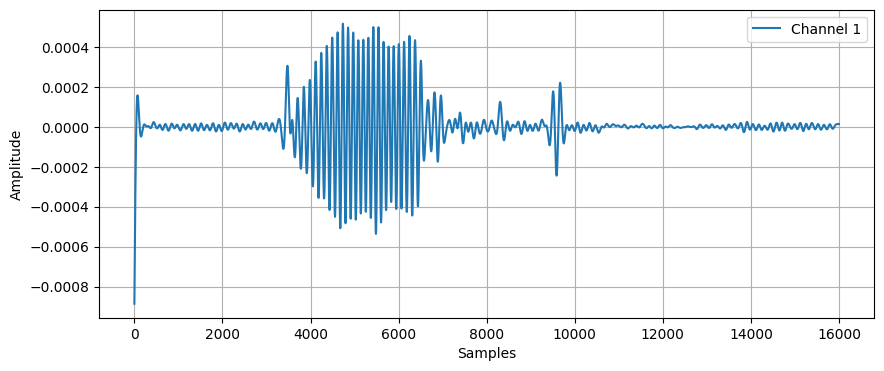

In [20]:
plot_signal(sig=arr_butter_01, sr=audio_params["framerate"], return_mode=False)

sosfilt with zi_enable=True

In [21]:
arr_butter_02 = filter_butterworth(
    audio_load[0].values, 
    fs=audio_params["framerate"], 
    cutoff_freq=3000, 
    method="sosfilt", 
    zi_enable=True
)

initial shape (3, 2)
if shape < 3, transform to:  (3, 2, 1)


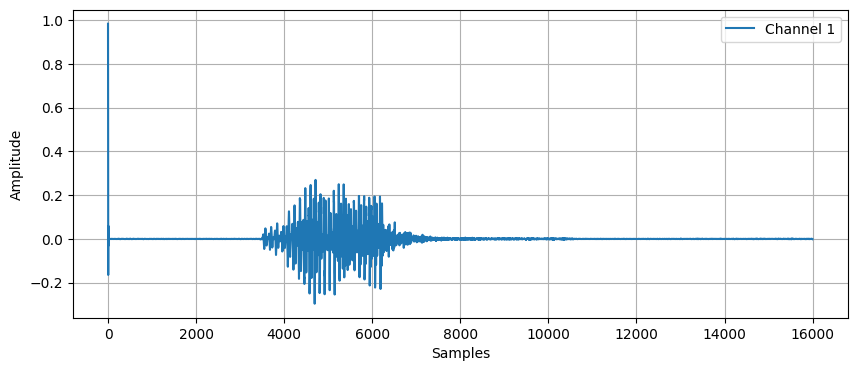

In [22]:
plot_signal(sig=arr_butter_02, sr=audio_params["framerate"], return_mode=False)

sosfilt with zi_enable=False

In [23]:
arr_butter_03 = filter_butterworth(
    audio_df.to_numpy(), 
    fs=audio_params["framerate"], 
    cutoff_freq=3000, 
    method="sosfilt", 
    zi_enable=False
)

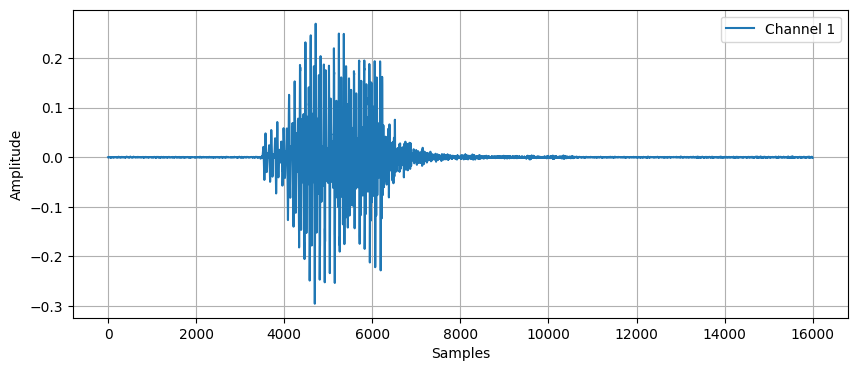

In [24]:
plot_signal(sig=arr_butter_03, sr=audio_params["framerate"], return_mode=False)

# Filtering - Median simple

In [25]:
from caits.filtering import filter_median_simple

In [26]:
arr_median = filter_median_simple(audio_df.to_numpy(), kernel_size=1)

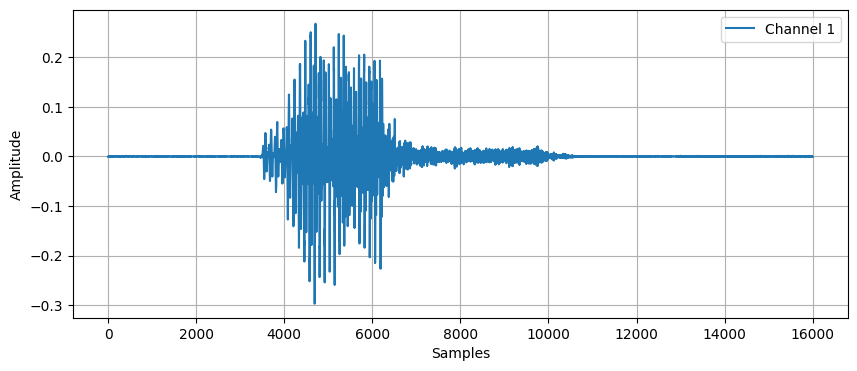

In [27]:
plot_signal(sig=arr_median, sr=audio_params["framerate"], return_mode=False)

# Filtering - Median Generic

In [28]:
from caits.filtering import filter_median_gen

In [29]:
arr_median_gen = filter_median_gen(audio_df.to_numpy(), window_size=200)

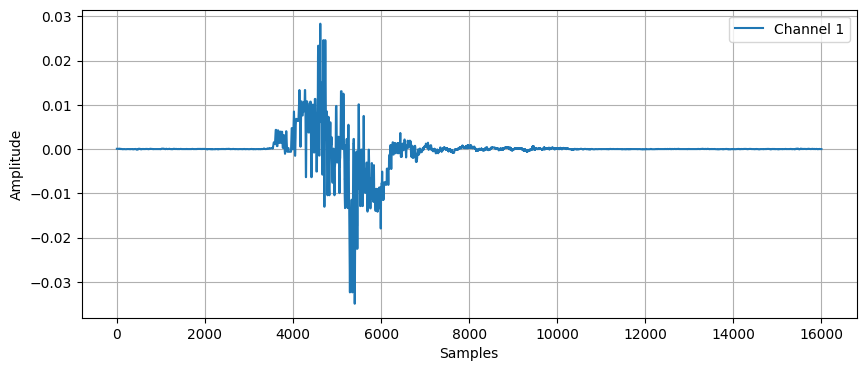

In [30]:
plot_signal(sig=arr_median_gen, sr=audio_params["framerate"], return_mode=False)

# Filtering - Gaussian

In [31]:
from caits.filtering import filter_gaussian

In [32]:
arr_gauss = filter_gaussian(audio_df.to_numpy(), sigma=20, order=2)

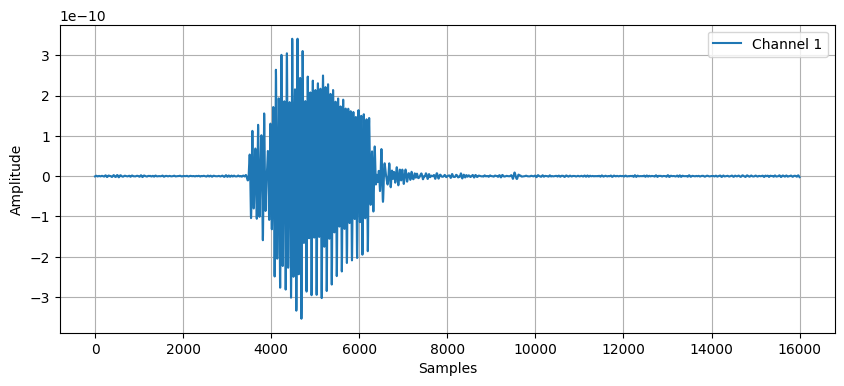

In [33]:
plot_signal(sig=arr_gauss, sr=audio_params["framerate"], return_mode=False)

# CSV - Multi-axis Motion Data

In [31]:
motion_df = pd.read_csv("data/scratching_eye.csv")

In [32]:
motion_df.head()

,acc_x_axis_g,acc_y_axis_g,acc_z_axis_g,gyr_x_axis_deg/s,gyr_y_axis_deg/s,gyr_z_axis_deg/s
0,1.131,0.342,-0.063,37.515,-44.408,-62.647
1,1.120,0.323,-0.241,35.563,22.143,-35.258
2,1.023,0.431,-0.146,42.212,78.263,-1.525
3,0.856,0.600,0.086,50.142,131.516,18.056
4,0.752,0.709,0.327,55.815,168.116,26.779


In [33]:
motion_df.shape

(1034, 6)

In [34]:
motion_channels = motion_df.columns
motion_channels

Index(['acc_x_axis_g', 'acc_y_axis_g', 'acc_z_axis_g', 'gyr_x_axis_deg/s',
       'gyr_y_axis_deg/s', 'gyr_z_axis_deg/s'],
      dtype='object')

In [35]:
# transform motion_channels object to list
motion_channels = motion_channels.tolist()

### Plotting

Plot the signals in samples and add the channels' names

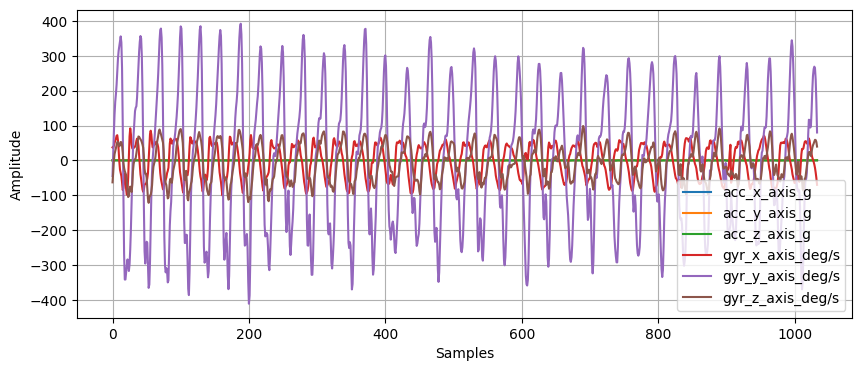

In [36]:
plot_signal(
    motion_df.values, 
    sr=config["sampling_rate"], 
    channels=motion_channels, 
    return_mode=False
)

In [40]:
motion_df.values.shape

(1034, 6)

### 

In [43]:
motion_axis = motion_df.values[:, 0]
motion_axis.shape

(1034,)

In [45]:
motion_axis = motion_axis.reshape(motion_axis.shape[0], 1)
motion_axis.shape

(1034, 1)

In [48]:
arr_butter_motion_ax = filter_butterworth(
    array=motion_axis, 
    fs=config["sampling_rate"], 
    cutoff_freq=5, 
    order=5, 
    method="filtfilt"
)

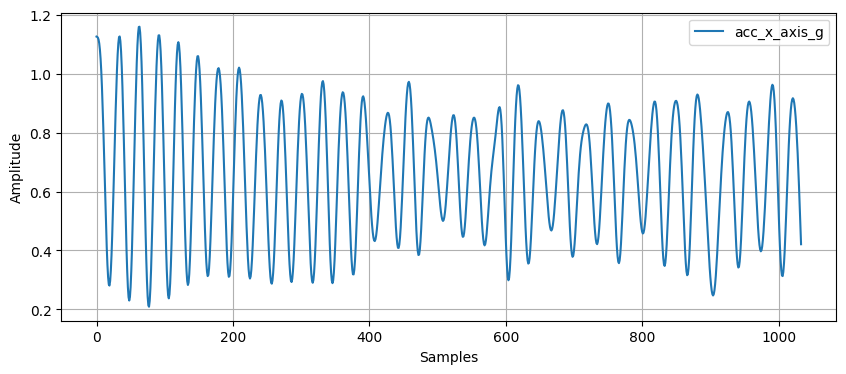

In [50]:
plot_signal(
    arr_butter_motion_ax, 
    sr=config["sampling_rate"], 
    channels=motion_channels[0], 
    return_mode=False
)

In [51]:
motion_arr = motion_df.values

In [52]:
type(motion_arr)

numpy.ndarray

In [53]:
motion_arr.shape

(1034, 6)

In [56]:
arr_butter_motion = filter_butterworth(
    array=motion_arr, 
    fs=config["sampling_rate"], 
    cutoff_freq=5, 
    order=5, 
    method="filtfilt"
)

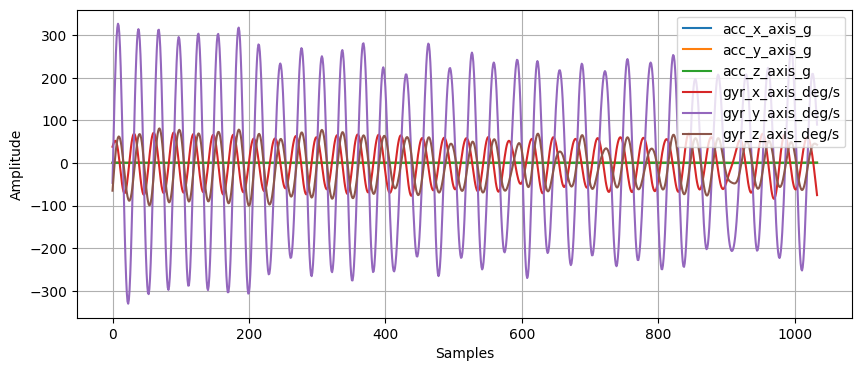

In [57]:
plot_signal(
    arr_butter_motion, 
    sr=config["sampling_rate"], 
    channels=motion_channels, 
    return_mode=False
)

In [62]:
arr_median_motion = filter_median_simple(
    motion_arr, 
    kernel_size=1
)

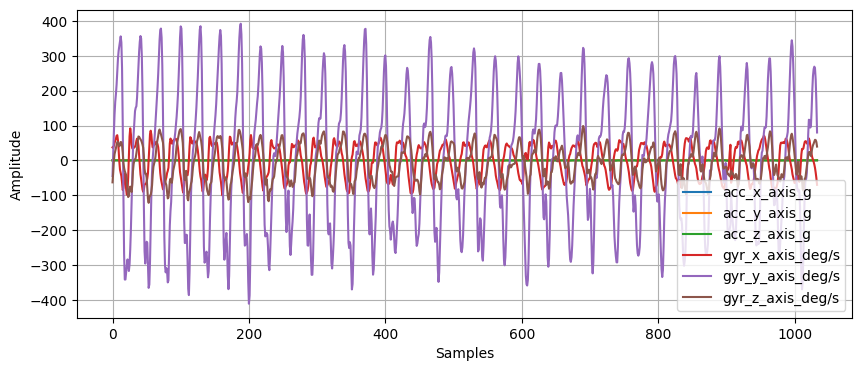

In [63]:
plot_signal(
    arr_median_motion, 
    sr=config["sampling_rate"], 
    channels=motion_channels, 
    return_mode=False
)

In [64]:
arr_median_gen_motion = filter_median_gen(
    motion_arr, 
    window_size=200
)

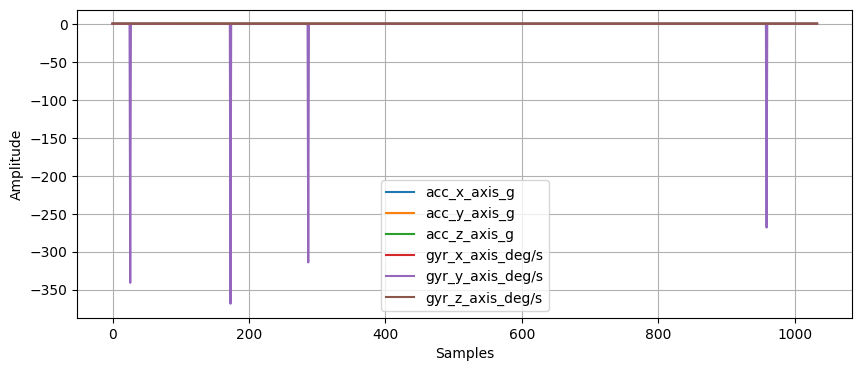

In [65]:
plot_signal(
    arr_median_gen_motion, 
    sr=config["sampling_rate"], 
    channels=motion_channels, 
    return_mode=False
)

In [66]:
arr_gauss_motion = filter_gaussian(
    motion_arr, 
    sigma=20, 
    order=5
)

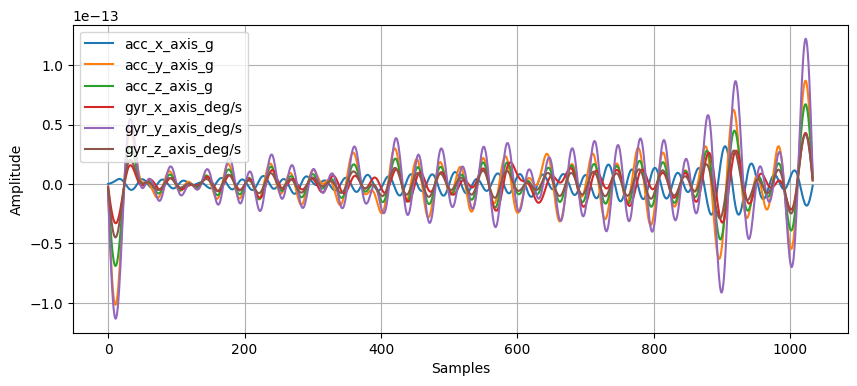

In [68]:
plot_signal(
    arr_gauss_motion, 
    sr=config["sampling_rate"], 
    channels=motion_channels, 
    return_mode=False
)